# Two-dimensional quantum dots using configuration interaction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from quantum_systems import TwoDimensionalHarmonicOscillator
from configuration_interaction import CIS, CID, CISD

## Defining the system

In [2]:
n = 2
l = 12

radius = 8
num_grid_points = 401
omega = 1 / 6
mass = 1

## Singles excitations

In [3]:
tdho = TwoDimensionalHarmonicOscillator(n, l, radius, num_grid_points, omega=omega, mass=mass)
tdho.setup_system()
tdho.change_to_hf_basis(tolerance=1e-10, verbose=True)

HF converged to given precision in 9 iterations
Ehf: (0.7691492058437307+0j)


In [4]:
cis = CIS(tdho, verbose=True, np=np)
cis.setup_ci_space()

Number of states to create: 21
Size of a state in bytes: 8
Time spent setting up CIS space: 0.004303932189941406 sec


In [5]:
cis.compute_ground_state()

Time spent constructing Hamiltonian: 1.520660638809204 sec
Time spent diagonalizing Hamiltonian: 0.0004799365997314453 sec


In [6]:
print("CIS ground state energy: {0}".format(cis.energies[0]))

CIS ground state energy: 0.7463531367705738


In [7]:
rho_cis = cis.compute_particle_density()

Time spent computing one-body matrix: 0.020713090896606445 sec


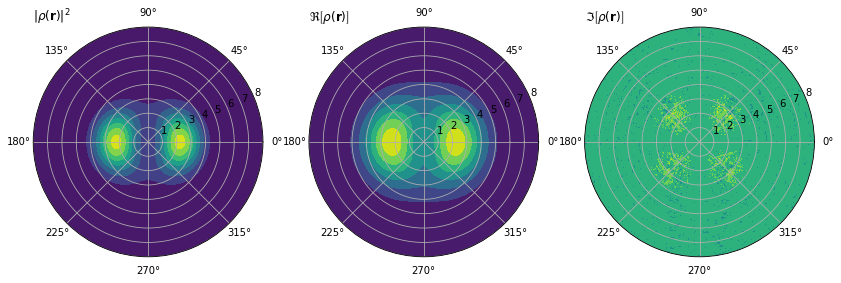

In [8]:
fig = plt.figure(figsize=(14, 10))

ax = fig.add_subplot(1, 3, 1, polar=True)
ax.set_title(r"$|\rho(\mathbf{r})|^2$", loc="left")
plt.contourf(tdho.T, tdho.R, np.abs(rho_cis * rho_cis.conj()))

ax = fig.add_subplot(1, 3, 2, polar=True)
ax.set_title(r"$\Re\left[\rho(\mathbf{r})\right]$", loc="left")
plt.contourf(tdho.T, tdho.R, rho_cis.real)

ax = fig.add_subplot(1, 3, 3, polar=True)
ax.set_title(r"$\Im\left[\rho(\mathbf{r})\right]$", loc="left")
plt.contourf(tdho.T, tdho.R, rho_cis.imag)
plt.show()

# Doubles excitations

In [9]:
tdho = TwoDimensionalHarmonicOscillator(n, l, radius, num_grid_points, omega=omega, mass=mass)
tdho.setup_system()
tdho.change_to_hf_basis(tolerance=1e-10, verbose=True)

HF converged to given precision in 9 iterations
Ehf: (0.7691492058437307+0j)


In [10]:
cid = CID(tdho, verbose=True, np=np)
cid.setup_ci_space()

Number of states to create: 46
Size of a state in bytes: 8
Time spent setting up CID space: 0.002088785171508789 sec


In [11]:
cid.compute_ground_state()

Time spent constructing Hamiltonian: 3.134596824645996 sec
Time spent diagonalizing Hamiltonian: 0.0019328594207763672 sec


In [12]:
print("CID ground state energy: {0}".format(cid.energies[0]))

CID ground state energy: 0.6713796881507581


In [13]:
rho_cid = cid.compute_particle_density()

Time spent computing one-body matrix: 0.05278730392456055 sec


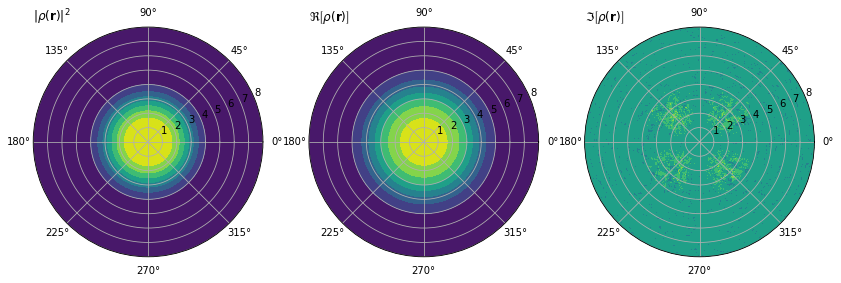

In [14]:
fig = plt.figure(figsize=(14, 10))

ax = fig.add_subplot(1, 3, 1, polar=True)
ax.set_title(r"$|\rho(\mathbf{r})|^2$", loc="left")
plt.contourf(tdho.T, tdho.R, np.abs(rho_cid * rho_cid.conj()))

ax = fig.add_subplot(1, 3, 2, polar=True)
ax.set_title(r"$\Re\left[\rho(\mathbf{r})\right]$", loc="left")
plt.contourf(tdho.T, tdho.R, rho_cid.real)

ax = fig.add_subplot(1, 3, 3, polar=True)
ax.set_title(r"$\Im\left[\rho(\mathbf{r})\right]$", loc="left")
plt.contourf(tdho.T, tdho.R, rho_cid.imag)
plt.show()

## Singles-doubles excitations

In [15]:
tdho = TwoDimensionalHarmonicOscillator(n, l, radius, num_grid_points, omega=omega, mass=mass)
tdho.setup_system()
tdho.change_to_hf_basis(tolerance=1e-10, verbose=True)

HF converged to given precision in 9 iterations
Ehf: (0.7691492058437307+0j)


In [16]:
cisd = CISD(tdho, verbose=True, np=np)
cisd.setup_ci_space()

Number of states to create: 66
Size of a state in bytes: 8
Time spent setting up CISD space: 9.083747863769531e-05 sec


In [17]:
cisd.compute_ground_state()

Time spent constructing Hamiltonian: 6.459835529327393 sec
Time spent diagonalizing Hamiltonian: 0.0009033679962158203 sec


In [18]:
print("CISD ground state energy: {0}".format(cisd.energies[0]))

CISD ground state energy: 0.6713692602619237


In [19]:
rho_cisd = cisd.compute_particle_density()

Time spent computing one-body matrix: 0.10586857795715332 sec


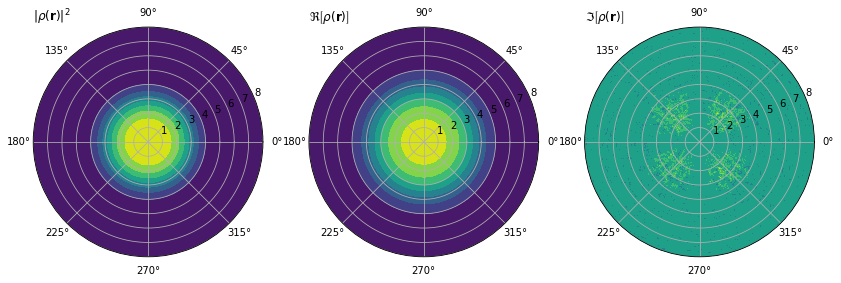

In [20]:
fig = plt.figure(figsize=(14, 10))

ax = fig.add_subplot(1, 3, 1, polar=True)
ax.set_title(r"$|\rho(\mathbf{r})|^2$", loc="left")
plt.contourf(tdho.T, tdho.R, np.abs(rho_cisd * rho_cisd.conj()))

ax = fig.add_subplot(1, 3, 2, polar=True)
ax.set_title(r"$\Re\left[\rho(\mathbf{r})\right]$", loc="left")
plt.contourf(tdho.T, tdho.R, rho_cisd.real)

ax = fig.add_subplot(1, 3, 3, polar=True)
ax.set_title(r"$\Im\left[\rho(\mathbf{r})\right]$", loc="left")
plt.contourf(tdho.T, tdho.R, rho_cisd.imag)
plt.show()